In [2]:
import pandas as pd
import numpy as np

### The Plan

Get each entity data to be in the wide format (only select the necessary features)

Group them together into the widest format to combine all data

Ready for rule mining

## Preparing the Demographics Data

In [4]:
#Demographics data
demo_df = pd.read_csv('C:\\Users\\USER\\Desktop\\FYP\\fyp-sandbox-2\\Data\\CLEAN_DATA/demographics.csv')
demo_df

,primaryid,caseid,i_f_code,age_yrs,age_bin,sex,Origin_country,wt_kg,init_fda_dt,fda_dt
0,193578573,19357857,F,7.00,Child,F,DE,19.800000,20210531,20210625
1,186972702,18697270,F,15.00,Teenager,F,CA,39.000000,20210105,20210628
2,186976496,18697649,F,16.00,Teenager,M,BR,39.000000,20210105,20220119
3,187294742,18729474,F,15.00,Teenager,M,DE,39.000000,20210112,20210824
4,188004601,18800460,I,13.00,Teenager,F,CA,39.000000,20210128,20210128
...,...,...,...,...,...,...,...,...,...,...
184045,192122501,19212250,I,16.00,Teenager,F,US,80.909091,20210504,20210504
184046,237422431,23742243,I,9.00,Child,F,SY,61.728750,20240415,20240415
184047,220202801,22020280,I,13.00,Teenager,M,US,80.920000,20230217,20230217
184048,213026962,21302696,F,0.83,Infant,F,CN,11.200000,20220907,20221018


In [12]:
demo_df.describe()

,primaryid,caseid,age_yrs,wt_kg,init_fda_dt,fda_dt
count,1.840360e+05,1.840360e+05,184036.000000,184036.000000,1.840360e+05,1.840360e+05
mean,2.286655e+08,2.193349e+07,10.537964,43.959091,2.022659e+07,2.022758e+07
std,1.408840e+08,1.800700e+06,5.358821,18.352304,1.132997e+04,1.138428e+04
min,1.869032e+08,1.869032e+07,0.010000,2.500000,2.021010e+07,2.021010e+07
25%,2.041631e+08,2.040637e+07,6.000000,21.000000,2.022013e+07,2.022031e+07
50%,2.205053e+08,2.203400e+07,12.000000,49.000000,2.023022e+07,2.023042e+07
75%,2.355927e+08,2.353214e+07,15.000000,58.915729,2.024022e+07,2.024041e+07
max,1.877835e+10,2.479978e+07,18.000000,80.920000,2.024123e+07,2.024123e+07


In [11]:
#Select ages that are positive only
# demo_df[demo_df['age_yrs'] > 0].sort_values(by=['age_yrs'],ascending=True)
demo_df = demo_df[demo_df['age_yrs'] > 0]
demo_df.sort_values(by=['age_yrs'],ascending=True)

,primaryid,caseid,i_f_code,age_yrs,age_bin,sex,Origin_country,wt_kg,init_fda_dt,fda_dt
138365,245731531,24573153,I,0.01,Neonate,F,GB,2.740000,20241101,20241101
141944,189050901,18905090,I,0.01,Neonate,F,IR,7.220098,20210217,20210217
141940,242706501,24270650,I,0.01,Neonate,M,AU,7.176044,20240831,20240831
153868,190355451,19035545,I,0.01,Neonate,M,US,8.658607,20210320,20210320
138360,208985321,20898532,I,0.01,Neonate,M,US,2.721000,20220601,20220601
...,...,...,...,...,...,...,...,...,...,...
104097,246311711,24631171,I,18.00,Teenager,M,US,62.539042,20241118,20241118
104071,246131771,24613177,I,18.00,Teenager,M,US,62.539042,20241113,20241113
104075,246199822,24619982,F,18.00,Teenager,M,US,62.539042,20241114,20241121
63374,187891703,18789170,F,18.00,Teenager,M,IT,60.320638,20210126,20210208


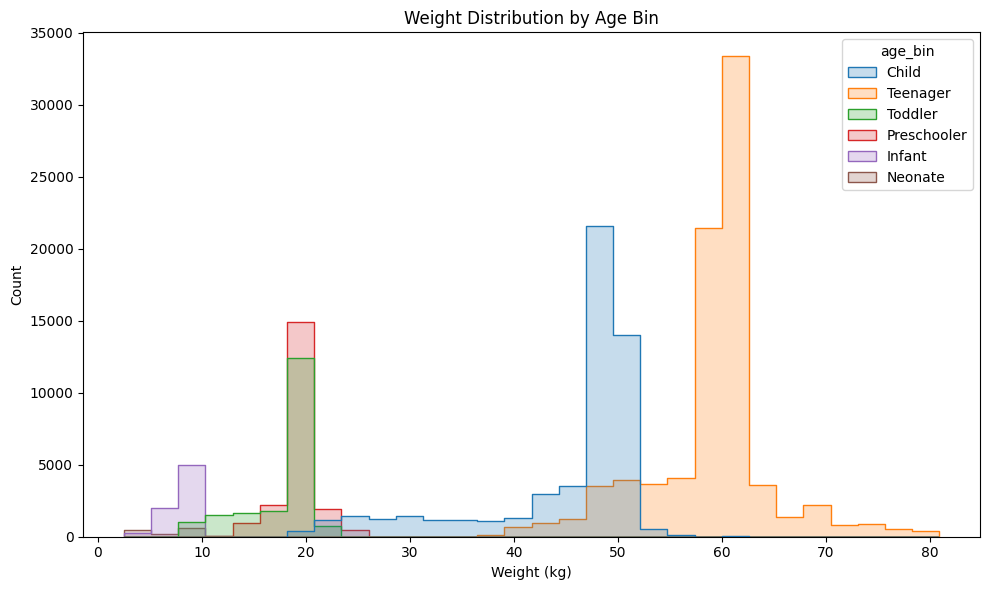

In [ ]:
#weight distribution for binning the weights
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=demo_df, x='wt_kg', hue='age_bin', bins=30, element='step', stat='count', common_norm=False)

plt.xlabel('Weight (kg)')
plt.ylabel('Count')
plt.title('Weight Distribution by Age Bin')
plt.tight_layout()
plt.show()

In [ ]:
# Age based Weight Binning for Efficient ARM
def weight_binning(df):
    try:
        if df['wt_kg'] is None or df['wt_kg'] != df['wt_kg']:  # Handles None and NaN
            return "N/A"
        elif df['wt_kg']  < 5:
            return "Below 5 kg"
        elif df['wt_kg']  < 10:
            return "5-10 kg"
        elif df['wt_kg']  < 20:
            return "10-20 kg"
        elif df['wt_kg']  < 40:
            return "20-40 kg"
        elif df['wt_kg']  < 60:
            return "40-60 kg"
        else:
            return "Above 60 kg"
    except:
        return "N/A"

In [23]:
#Apply the function
demo_df['wt_bin'] = demo_df.apply(weight_binning, axis=1)
demo_df

C:\Users\USER\AppData\Local\Temp\ipykernel_17228\3630397617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_df['wt_bin'] = demo_df.apply(weight_binning, axis=1)


,primaryid,caseid,i_f_code,age_yrs,age_bin,sex,Origin_country,wt_kg,init_fda_dt,fda_dt,wt_bin
0,193578573,19357857,F,7.00,Child,F,DE,19.800000,20210531,20210625,10-20 kg
1,186972702,18697270,F,15.00,Teenager,F,CA,39.000000,20210105,20210628,20-40 kg
2,186976496,18697649,F,16.00,Teenager,M,BR,39.000000,20210105,20220119,20-40 kg
3,187294742,18729474,F,15.00,Teenager,M,DE,39.000000,20210112,20210824,20-40 kg
4,188004601,18800460,I,13.00,Teenager,F,CA,39.000000,20210128,20210128,20-40 kg
...,...,...,...,...,...,...,...,...,...,...,...
184045,192122501,19212250,I,16.00,Teenager,F,US,80.909091,20210504,20210504,Above 60 kg
184046,237422431,23742243,I,9.00,Child,F,SY,61.728750,20240415,20240415,Above 60 kg
184047,220202801,22020280,I,13.00,Teenager,M,US,80.920000,20230217,20230217,Above 60 kg
184048,213026962,21302696,F,0.83,Infant,F,CN,11.200000,20220907,20221018,10-20 kg


In [24]:
demo_df['wt_bin'].value_counts()

wt_bin
40-60 kg       82773
Above 60 kg    43664
10-20 kg       27837
20-40 kg       20667
5-10 kg         8505
Below 5 kg       590
Name: count, dtype: int64

In [28]:
#Selecting only the features needed
demo_df_intrm = demo_df[['primaryid', 'age_bin', 'wt_bin', 'sex', 'Origin_country']]
print(f'{len(demo_df_intrm)}')
print(f'{len(demo_df_intrm.drop_duplicates())}')

184036
184036


In [29]:
demo_df_intrm

,primaryid,age_bin,wt_bin,sex,Origin_country
0,193578573,Child,10-20 kg,F,DE
1,186972702,Teenager,20-40 kg,F,CA
2,186976496,Teenager,20-40 kg,M,BR
3,187294742,Teenager,20-40 kg,M,DE
4,188004601,Teenager,20-40 kg,F,CA
...,...,...,...,...,...
184045,192122501,Teenager,Above 60 kg,F,US
184046,237422431,Child,Above 60 kg,F,SY
184047,220202801,Teenager,Above 60 kg,M,US
184048,213026962,Infant,10-20 kg,F,CN


In [57]:
#Grouping the demographic data into a list
def mk_demo_list(row):
    return [
        f"age_bin_{row['age_bin']}".lower(),
        f"weight_{row['wt_bin']}".lower(),
        f"sex_{row['sex']}".lower(),
        f"origin_{row['Origin_country']}".lower()
    ]

demo_df_intrm['demo_list'] = demo_df_intrm.apply(mk_demo_list, axis=1)
demo_df_intrm

C:\Users\USER\AppData\Local\Temp\ipykernel_17228\3324954779.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_df_intrm['demo_list'] = demo_df_intrm.apply(mk_demo_list, axis=1)


,primaryid,age_bin,wt_bin,sex,Origin_country,demo_list
0,193578573,Child,10-20 kg,F,DE,"[age_bin_child, weight_10-20 kg, sex_f, origin..."
1,186972702,Teenager,20-40 kg,F,CA,"[age_bin_teenager, weight_20-40 kg, sex_f, ori..."
2,186976496,Teenager,20-40 kg,M,BR,"[age_bin_teenager, weight_20-40 kg, sex_m, ori..."
3,187294742,Teenager,20-40 kg,M,DE,"[age_bin_teenager, weight_20-40 kg, sex_m, ori..."
4,188004601,Teenager,20-40 kg,F,CA,"[age_bin_teenager, weight_20-40 kg, sex_f, ori..."
...,...,...,...,...,...,...
184045,192122501,Teenager,Above 60 kg,F,US,"[age_bin_teenager, weight_above 60 kg, sex_f, ..."
184046,237422431,Child,Above 60 kg,F,SY,"[age_bin_child, weight_above 60 kg, sex_f, ori..."
184047,220202801,Teenager,Above 60 kg,M,US,"[age_bin_teenager, weight_above 60 kg, sex_m, ..."
184048,213026962,Infant,10-20 kg,F,CN,"[age_bin_infant, weight_10-20 kg, sex_f, origi..."


Prefixing each value with the column name avoids name collisions and results with better rule mining

In [58]:
demographics_grouped = demo_df_intrm[['primaryid', 'demo_list']]
demographics_grouped

,primaryid,demo_list
0,193578573,"[age_bin_child, weight_10-20 kg, sex_f, origin..."
1,186972702,"[age_bin_teenager, weight_20-40 kg, sex_f, ori..."
2,186976496,"[age_bin_teenager, weight_20-40 kg, sex_m, ori..."
3,187294742,"[age_bin_teenager, weight_20-40 kg, sex_m, ori..."
4,188004601,"[age_bin_teenager, weight_20-40 kg, sex_f, ori..."
...,...,...
184045,192122501,"[age_bin_teenager, weight_above 60 kg, sex_f, ..."
184046,237422431,"[age_bin_child, weight_above 60 kg, sex_f, ori..."
184047,220202801,"[age_bin_teenager, weight_above 60 kg, sex_m, ..."
184048,213026962,"[age_bin_infant, weight_10-20 kg, sex_f, origi..."


## Preparing Drugs Data

In [30]:
drugs_df = pd.read_csv('C:\\Users\\USER\\Desktop\\FYP\\fyp-sandbox-2\\Data\\CLEAN_DATA/drugs_data.csv')
drugs_df

,primaryid,caseid,drug_seq,role_cod,drugname,corr_prod_ai
0,186903151,18690315,1,PS,CARBAGLU,CARGLUMIC ACID
1,186903151,18690315,2,SS,CARBAGLU,CARGLUMIC ACID
2,186903752,18690375,1,PS,CYSTADANE,BETAINE
3,186903752,18690375,2,C,VITAMIN D,VITAMIN D NOS
4,186903752,18690375,3,C,FOLIC ACID.,FOLIC ACID
...,...,...,...,...,...,...
668134,247997801,24799780,1,PS,BEYFORTUS,NIRSEVIMAB-ALIP
668135,247997801,24799780,2,SS,PENTACEL,DIPHTHERIA AND TETANUS TOXOIDS AND ACELLULAR P...
668136,247997801,24799780,3,SS,PREVNAR 20,PNEUMOCOCCAL 20-VALENT CONJUGATE VACCINE
668137,247997801,24799780,4,SS,HUMAN ROTAVIRUS A,HUMAN ROTAVIRUS A


In [67]:
# Bringing all values to a standard format by trimming strings
import re

def clean_string(value):
    if not isinstance(value, str):
        return value
    value = value.lower().strip()
    value = re.sub(r'[^\w\s]', '', value) # Remove punctuations
    value = re.sub(r'\s+', '_', value) # Replace whitespace with underscore
    return value

In [68]:
drugs_df['drug_name'] = drugs_df['drugname'].apply(lambda x: "drug_" + clean_string(x))
drugs_df

,primaryid,caseid,drug_seq,role_cod,drugname,corr_prod_ai,drug_name
0,186903151,18690315,1,PS,CARBAGLU,CARGLUMIC ACID,drug_carbaglu
1,186903151,18690315,2,SS,CARBAGLU,CARGLUMIC ACID,drug_carbaglu
2,186903752,18690375,1,PS,CYSTADANE,BETAINE,drug_cystadane
3,186903752,18690375,2,C,VITAMIN D,VITAMIN D NOS,drug_vitamin_d
4,186903752,18690375,3,C,FOLIC ACID.,FOLIC ACID,drug_folic_acid
...,...,...,...,...,...,...,...
668134,247997801,24799780,1,PS,BEYFORTUS,NIRSEVIMAB-ALIP,drug_beyfortus
668135,247997801,24799780,2,SS,PENTACEL,DIPHTHERIA AND TETANUS TOXOIDS AND ACELLULAR P...,drug_pentacel
668136,247997801,24799780,3,SS,PREVNAR 20,PNEUMOCOCCAL 20-VALENT CONJUGATE VACCINE,drug_prevnar_20
668137,247997801,24799780,4,SS,HUMAN ROTAVIRUS A,HUMAN ROTAVIRUS A,drug_human_rotavirus_a


In [70]:
#Only selecting the features needed
drugs_df_intrm = drugs_df[['primaryid', 'drug_name']].drop_duplicates()
drugs_df_intrm

,primaryid,drug_name
0,186903151,drug_carbaglu
2,186903752,drug_cystadane
3,186903752,drug_vitamin_d
4,186903752,drug_folic_acid
5,186903752,drug_gabapentin
...,...,...
668134,247997801,drug_beyfortus
668135,247997801,drug_pentacel
668136,247997801,drug_prevnar_20
668137,247997801,drug_human_rotavirus_a


In [72]:
drugs_grouped = drugs_df_intrm.groupby('primaryid')['drug_name'].apply(list).reset_index()
drugs_grouped

,primaryid,drug_name
0,186903151,[drug_carbaglu]
1,186903342,"[drug_evrysdi, drug_spinraza]"
2,186903752,"[drug_cystadane, drug_vitamin_d, drug_folic_ac..."
3,186903891,"[drug_morphine, drug_zopiclone, drug_bucinnazi..."
4,186904301,"[drug_quetiapine_fumarate, drug_aripiprazole, ..."
...,...,...
184045,2429113312,"[drug_activase, drug_lovenox]"
184046,2440617610,"[drug_hydrocortisone_sodium_succinate, drug_me..."
184047,2441254113,"[drug_carboplatin, drug_cytarabine, drug_colum..."
184048,2443173611,"[drug_carboplatin, drug_hydrocortisone, drug_r..."


## Preparing Reactions Data

In [39]:
reac_df = pd.read_csv('C:\\Users\\USER\\Desktop\\FYP\\fyp-sandbox-2\\Data\\CLEAN_DATA/reactions.csv')
reac_df

,primaryid,caseid,pt
0,186903151,18690315,Off label use
1,186903752,18690375,Muscle atrophy
2,186903891,18690389,Drug dependence
3,186903891,18690389,Drug withdrawal syndrome
4,186904301,18690430,Drug ineffective
...,...,...,...
564377,247988941,24798894,Incorrect dose administered
564378,247993241,24799324,Influenza
564379,247996651,24799665,Skin discolouration
564380,247997801,24799780,Rash erythematous


In [73]:
reac_df['reaction'] = reac_df['pt'].apply(lambda x: "reaction_" + clean_string(x))
reac_df

,primaryid,caseid,pt,reaction
0,186903151,18690315,Off label use,reaction_off_label_use
1,186903752,18690375,Muscle atrophy,reaction_muscle_atrophy
2,186903891,18690389,Drug dependence,reaction_drug_dependence
3,186903891,18690389,Drug withdrawal syndrome,reaction_drug_withdrawal_syndrome
4,186904301,18690430,Drug ineffective,reaction_drug_ineffective
...,...,...,...,...
564377,247988941,24798894,Incorrect dose administered,reaction_incorrect_dose_administered
564378,247993241,24799324,Influenza,reaction_influenza
564379,247996651,24799665,Skin discolouration,reaction_skin_discolouration
564380,247997801,24799780,Rash erythematous,reaction_rash_erythematous


In [77]:
reac_df_intrm = reac_df[['primaryid', 'reaction']].drop_duplicates()
reactions_grouped = reac_df_intrm.groupby('primaryid')['reaction'].apply(list).reset_index()
reactions_grouped

,primaryid,reaction
0,186903151,[reaction_off_label_use]
1,186903342,"[reaction_heart_rate_increased, reaction_dyspn..."
2,186903752,[reaction_muscle_atrophy]
3,186903891,"[reaction_drug_dependence, reaction_drug_withd..."
4,186904301,"[reaction_drug_ineffective, reaction_sedation]"
...,...,...
184045,2429113312,"[reaction_product_quality_issue, reaction_inap..."
184046,2440617610,"[reaction_sepsis, reaction_off_label_use, reac..."
184047,2441254113,"[reaction_sepsis, reaction_off_label_use, reac..."
184048,2443173611,"[reaction_sepsis, reaction_febrile_neutropenia..."


## Preparing Outcome Data

In [45]:
outc_df = pd.read_csv('C:\\Users\\USER\\Desktop\\FYP\\fyp-sandbox-2\\Data\\CLEAN_DATA/outcomes.csv')
outc_df

,primaryid,caseid,outc_cod
0,186903151,18690315,OT
1,186903752,18690375,HO
2,186903891,18690389,HO
3,186903891,18690389,OT
4,186904301,18690430,OT
...,...,...,...
135520,247952521,24795252,DS
135521,247953881,24795388,OT
135522,247954711,24795471,HO
135523,247955631,24795563,OT


In [80]:
outc_df['outcome'] = outc_df['outc_cod'].apply(lambda x: "outc_" + clean_string(x))
outc_df

,primaryid,caseid,outc_cod,outcome
0,186903151,18690315,OT,outc_ot
1,186903752,18690375,HO,outc_ho
2,186903891,18690389,HO,outc_ho
3,186903891,18690389,OT,outc_ot
4,186904301,18690430,OT,outc_ot
...,...,...,...,...
135520,247952521,24795252,DS,outc_ds
135521,247953881,24795388,OT,outc_ot
135522,247954711,24795471,HO,outc_ho
135523,247955631,24795563,OT,outc_ot


In [81]:
outc_df_intrm = outc_df[['primaryid', 'outcome']].drop_duplicates()
outcomes_grouped = outc_df_intrm.groupby('primaryid')['outcome'].apply(list).reset_index()
outcomes_grouped

,primaryid,outcome
0,186903151,[outc_ot]
1,186903342,"[outc_lt, outc_ho]"
2,186903752,[outc_ho]
3,186903891,"[outc_ho, outc_ot]"
4,186904301,"[outc_ot, outc_ho]"
...,...,...
100430,2429113312,[outc_de]
100431,2440617610,"[outc_lt, outc_ot]"
100432,2441254113,"[outc_ot, outc_lt]"
100433,2443173611,"[outc_lt, outc_ot]"


Now that all the data is prepared for each entity, we need to combine them into just one wide formatted dataframe which can be used for ARM

## Combining Lists

In [83]:
combined_cases = demographics_grouped.merge(drugs_grouped, on='primaryid', how='inner') \
                     .merge(reactions_grouped, on='primaryid', how='inner') \
                     .merge(outcomes_grouped, on='primaryid', how='left')

combined_cases

,primaryid,demo_list,drug_name,reaction,outcome
0,193578573,"[age_bin_child, weight_10-20 kg, sex_f, origin...","[drug_canakinumab, drug_cotrim, drug_prednisol...","[reaction_aspartate_aminotransferase_abnormal,...","[outc_de, outc_ho, outc_ot]"
1,186972702,"[age_bin_teenager, weight_20-40 kg, sex_f, ori...",[drug_remicade],[reaction_nasal_abscess],[outc_ot]
2,186976496,"[age_bin_teenager, weight_20-40 kg, sex_m, ori...","[drug_idursulfase, drug_risperidone, drug_acet...","[reaction_cerebral_thrombosis, reaction_suspec...","[outc_ho, outc_ot]"
3,187294742,"[age_bin_teenager, weight_20-40 kg, sex_m, ori...","[drug_idursulfase, drug_melperon, drug_melaton...","[reaction_carpal_tunnel_syndrome, reaction_inf...",NaN
4,188004601,"[age_bin_teenager, weight_20-40 kg, sex_f, ori...","[drug_voriconazole, drug_domperidone, drug_kep...","[reaction_bone_disorder, reaction_bone_formati...","[outc_ho, outc_lt]"
...,...,...,...,...,...
184031,192122501,"[age_bin_teenager, weight_above 60 kg, sex_f, ...",[drug_nexplanon],"[reaction_abdominal_pain_upper, reaction_vomit...",[outc_ot]
184032,237422431,"[age_bin_child, weight_above 60 kg, sex_f, ori...","[drug_etoposide, drug_doxorubicin, drug_vincri...","[reaction_off_label_use, reaction_drug_intoler...",[outc_de]
184033,220202801,"[age_bin_teenager, weight_above 60 kg, sex_m, ...",[drug_risperidone],"[reaction_behaviour_disorder, reaction_aggress...",[outc_ot]
184034,213026962,"[age_bin_infant, weight_10-20 kg, sex_f, origi...","[drug_zyvox, drug_linezolid]","[reaction_off_label_use, reaction_agranulocyto...",[outc_ho]


In [86]:
def safe_list(val): #to convert NaN values to a list for concatenating
    return val if isinstance(val, list) else [] 

def combine_lists(row):
    return list(set(
        safe_list(row['demo_list']) +
        safe_list(row['drug_name']) +
        safe_list(row['reaction']) +
        safe_list(row['outcome'])
    ))

combined_cases['combined_case_ls'] = combined_cases.apply(combine_lists, axis=1)
combined_cases

,primaryid,demo_list,drug_name,reaction,outcome,combined_case_ls
0,193578573,"[age_bin_child, weight_10-20 kg, sex_f, origin...","[drug_canakinumab, drug_cotrim, drug_prednisol...","[reaction_aspartate_aminotransferase_abnormal,...","[outc_de, outc_ho, outc_ot]","[age_bin_child, reaction_general_physical_cond..."
1,186972702,"[age_bin_teenager, weight_20-40 kg, sex_f, ori...",[drug_remicade],[reaction_nasal_abscess],[outc_ot],"[age_bin_teenager, outc_ot, drug_remicade, wei..."
2,186976496,"[age_bin_teenager, weight_20-40 kg, sex_m, ori...","[drug_idursulfase, drug_risperidone, drug_acet...","[reaction_cerebral_thrombosis, reaction_suspec...","[outc_ho, outc_ot]",[reaction_inappropriate_schedule_of_product_ad...
3,187294742,"[age_bin_teenager, weight_20-40 kg, sex_m, ori...","[drug_idursulfase, drug_melperon, drug_melaton...","[reaction_carpal_tunnel_syndrome, reaction_inf...",NaN,"[drug_sultamicillin, age_bin_teenager, drug_me..."
4,188004601,"[age_bin_teenager, weight_20-40 kg, sex_f, ori...","[drug_voriconazole, drug_domperidone, drug_kep...","[reaction_bone_disorder, reaction_bone_formati...","[outc_ho, outc_lt]","[reaction_xray_abnormal, outc_ho, age_bin_teen..."
...,...,...,...,...,...,...
184031,192122501,"[age_bin_teenager, weight_above 60 kg, sex_f, ...",[drug_nexplanon],"[reaction_abdominal_pain_upper, reaction_vomit...",[outc_ot],"[reaction_abdominal_pain_upper, origin_us, wei..."
184032,237422431,"[age_bin_child, weight_above 60 kg, sex_f, ori...","[drug_etoposide, drug_doxorubicin, drug_vincri...","[reaction_off_label_use, reaction_drug_intoler...",[outc_de],"[age_bin_child, weight_above 60 kg, drug_doxor..."
184033,220202801,"[age_bin_teenager, weight_above 60 kg, sex_m, ...",[drug_risperidone],"[reaction_behaviour_disorder, reaction_aggress...",[outc_ot],"[origin_us, weight_above 60 kg, age_bin_teenag..."
184034,213026962,"[age_bin_infant, weight_10-20 kg, sex_f, origi...","[drug_zyvox, drug_linezolid]","[reaction_off_label_use, reaction_agranulocyto...",[outc_ho],"[origin_cn, drug_linezolid, reaction_off_label..."


In [88]:
arm_ready_df = combined_cases[['primaryid', 'combined_case_ls']]
arm_ready_df

,primaryid,combined_case_ls
0,193578573,"[age_bin_child, reaction_general_physical_cond..."
1,186972702,"[age_bin_teenager, outc_ot, drug_remicade, wei..."
2,186976496,[reaction_inappropriate_schedule_of_product_ad...
3,187294742,"[drug_sultamicillin, age_bin_teenager, drug_me..."
4,188004601,"[reaction_xray_abnormal, outc_ho, age_bin_teen..."
...,...,...
184031,192122501,"[reaction_abdominal_pain_upper, origin_us, wei..."
184032,237422431,"[age_bin_child, weight_above 60 kg, drug_doxor..."
184033,220202801,"[origin_us, weight_above 60 kg, age_bin_teenag..."
184034,213026962,"[origin_cn, drug_linezolid, reaction_off_label..."


In [89]:
#Export as a csv
arm_ready_df.to_csv('C:\\Users\\USER\\Desktop\\FYP\\fyp-sandbox-2\\Data\\ARM_DATA/arm_landing.csv', index=False)